<a href="https://colab.research.google.com/github/Vedika945/Order-Priority/blob/main/16_OrderPriority.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount

<function google.colab.drive.mount(mountpoint, force_remount=False, timeout_ms=120000, readonly=False)>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/SuperStoreUS-2015.xlsx')

In [ ]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Name,City,Postal Code,Order Date,Ship Date,Quantity ordered new,Sales,Order ID,Profit
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,SANFORD Liquid Accent™ Tank-Style Highlighters,Anacortes,98221,2015-01-07,2015-01-08,4.0,13.01,88522,4.5600
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Global Troy™ Executive Leather Low-Back Tilter,San Gabriel,91776,2015-06-13,2015-06-15,NaN,6362.85,90193,4390.3665
2,21776,Critical,NaN,9.48,NaN,11,Marcus Dunlap,Regular Air,NaN,Furniture,"DAX Two-Tone Rosewood/Black Document Frame, De...",NaN,7203,2015-02-15,2015-02-17,22.0,211.15,90192,-53.8096
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,Prior Lake,55372,2015-05-12,2015-05-14,16.0,1164.45,86838,803.4705
4,24846,Medium,NaN,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Newell 321,Prior Lake,55372,2015-05-12,2015-05-13,7.0,22.23,86838,-24.0300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1888 non-null   object        
 2   Discount              1906 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1929 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1934 non-null   object        
 9   Product Category      1937 non-null   object        
 10  Product Name          1952 non-null   object        
 11  City                  1932 non-null   object        
 12  Postal Code           1952 non-null   int64         
 13  Order Date        

## **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1888 non-null   object        
 2   Discount              1906 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1929 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1934 non-null   object        
 9   Product Category      1937 non-null   object        
 10  Product Name          1952 non-null   object        
 11  City                  1932 non-null   object        
 12  Postal Code           1952 non-null   int64         
 13  Order Date        

In [ ]:
df.isna()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Name,City,Postal Code,Order Date,Ship Date,Quantity ordered new,Sales,Order ID,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1948,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False
1949,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1950,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Row ID                   0
Order Priority          64
Discount                46
Unit Price               0
Shipping Cost           23
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment        18
Product Category        15
Product Name             0
City                    20
Postal Code              0
Order Date               0
Ship Date                0
Quantity ordered new    17
Sales                    0
Order ID                 0
Profit                   0
dtype: int64

In [ ]:
df.isna().sum().sum()

203

In [ ]:
import numpy as np
df.replace(['##','??'],np.NaN,inplace=True)

In [ ]:
new_df=df.fillna({'Order Priority':df['Order Priority'].mode()[0],
              'Customer Segment':df['Customer Segment'].mode()[0],
              'Product Category':df['Product Category'].mode()[0],
              'Discount':df['Discount'].mean(),
              'Shipping Cost':df['Shipping Cost'].mean(),
              'City':df['City'].mode()[0],
              'Quantity ordered new':df['Quantity ordered new'].mean()})

In [ ]:
new_df

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Name,City,Postal Code,Order Date,Ship Date,Quantity ordered new,Sales,Order ID,Profit
0,20847,High,0.010000,2.84,0.930000,3,Bonnie Potter,Express Air,Corporate,Office Supplies,SANFORD Liquid Accent™ Tank-Style Highlighters,Anacortes,98221,2015-01-07,2015-01-08,4.000000,13.01,88522,4.5600
1,20228,Not Specified,0.020000,500.98,26.000000,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Global Troy™ Executive Leather Low-Back Tilter,San Gabriel,91776,2015-06-13,2015-06-15,12.955556,6362.85,90193,4390.3665
2,21776,Critical,0.049035,9.48,13.035656,11,Marcus Dunlap,Regular Air,Corporate,Furniture,"DAX Two-Tone Rosewood/Black Document Frame, De...",New York City,7203,2015-02-15,2015-02-17,22.000000,211.15,90192,-53.8096
3,24844,Medium,0.090000,78.69,19.990000,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,Prior Lake,55372,2015-05-12,2015-05-14,16.000000,1164.45,86838,803.4705
4,24846,Medium,0.049035,3.28,2.310000,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Newell 321,Prior Lake,55372,2015-05-12,2015-05-13,7.000000,22.23,86838,-24.0300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,0.010000,10.90,7.460000,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,Crate-A-Files™,Danville,61832,2015-03-11,2015-03-12,18.000000,207.31,87536,-116.7600
1948,19843,High,0.100000,7.99,13.035656,3397,Andrea Shaw,Regular Air,Corporate,Technology,Bell Sonecor JB700 Caller ID,New York City,61832,2015-03-11,2015-03-12,22.000000,143.12,87536,-160.9520
1949,26208,Not Specified,0.080000,11.97,5.810000,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,Staples SlimLine Pencil Sharpener,Des Plaines,60016,2015-03-29,2015-03-31,5.000000,59.98,87534,-41.8700
1950,24911,Medium,0.100000,9.38,4.930000,3400,Florence Gold,Express Air,Small Business,Furniture,Eldon Expressions Punched Metal & Wood Desk Ac...,Fairmont,26554,2015-04-04,2015-04-04,15.000000,135.78,87537,-24.7104


In [ ]:
new_df.isna().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Name            0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Quantity ordered new    0
Sales                   0
Order ID                0
Profit                  0
dtype: int64

In [ ]:
new_df.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Postal Code,Order Date,Ship Date,Quantity ordered new,Sales,Order ID,Profit
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952,1952,1952.000000,1952.000000,1952.000000,1952.000000
mean,19916.479508,0.049035,109.079221,13.035656,1735.376537,51534.769467,2015-03-29 01:21:08.852459008,2015-03-30 23:55:34.426229248,12.955556,985.828832,82365.924180,114.793859
min,64.000000,0.000000,1.140000,0.490000,3.000000,1001.000000,2015-01-01 00:00:00,2015-01-02 00:00:00,1.000000,2.250000,359.000000,-16476.838000
25%,19121.000000,0.020000,6.480000,3.300000,875.000000,28560.000000,2015-02-11 00:00:00,2015-02-13 00:00:00,5.000000,58.807500,86767.750000,-84.485400
50%,21164.500000,0.050000,20.990000,6.220000,1738.000000,48765.500000,2015-03-27 12:00:00,2015-03-29 00:00:00,10.000000,202.395000,88376.000000,1.476450
75%,23483.250000,0.070000,100.972500,14.300000,2578.250000,78550.000000,2015-05-15 00:00:00,2015-05-16 00:00:00,16.000000,802.945000,89957.000000,116.201575
max,26389.000000,0.210000,6783.020000,164.730000,3403.000000,99362.000000,2015-06-30 00:00:00,2015-07-08 00:00:00,167.000000,45737.330000,91586.000000,9228.225600
std,5957.595627,0.031003,393.481301,17.393317,991.078006,29362.828420,NaN,NaN,13.844494,2559.900167,19042.295798,1141.112387


In [ ]:
new_df.shape

(1952, 19)

### **Data Preprocessing and Transformation**

In [ ]:
new_df_num=new_df.select_dtypes(exclude='object')
new_df_num.corr()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Postal Code,Order Date,Ship Date,Quantity ordered new,Sales,Order ID,Profit
Row ID,1.000000,0.023764,-0.004427,-0.015144,0.064071,0.033578,-0.011993,-0.012257,-0.569224,-0.258827,0.918497,-0.038468
Discount,0.023764,1.000000,-0.010811,0.029532,0.014370,-0.027152,0.039020,0.039166,-0.015828,-0.033625,0.022035,-0.060472
Unit Price,-0.004427,-0.010811,1.000000,0.195191,-0.008717,0.016086,-0.053440,-0.053471,-0.071677,0.443509,0.003292,-0.182067
Shipping Cost,-0.015144,0.029532,0.195191,1.000000,-0.019134,-0.030539,-0.031505,-0.031763,-0.008210,0.320958,-0.013914,0.002899
Customer ID,0.064071,0.014370,-0.008717,-0.019134,1.000000,-0.096491,-0.000130,-0.000480,-0.027946,-0.015412,0.069118,0.008852
Postal Code,0.033578,-0.027152,0.016086,-0.030539,-0.096491,1.000000,-0.035973,-0.034990,-0.013454,-0.019699,0.052141,0.033033
Order Date,-0.011993,0.039020,-0.053440,-0.031505,-0.000130,-0.035973,1.000000,0.999474,0.151384,0.043746,0.000238,0.070020
Ship Date,-0.012257,0.039166,-0.053471,-0.031763,-0.000480,-0.034990,0.999474,1.000000,0.151482,0.043237,0.000326,0.070615
Quantity ordered new,-0.569224,-0.015828,-0.071677,-0.008210,-0.027946,-0.013454,0.151384,0.151482,1.000000,0.303983,-0.589784,0.119234
Sales,-0.258827,-0.033625,0.443509,0.320958,-0.015412,-0.019699,0.043746,0.043237,0.303983,1.000000,-0.270939,0.364258


##Perason's Correlation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
new_df_num.head()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Postal Code,Order Date,Ship Date,Quantity ordered new,Sales,Order ID,Profit
0,20847,0.010000,2.84,0.930000,3,98221,2015-01-07,2015-01-08,4.000000,13.01,88522,4.5600
1,20228,0.020000,500.98,26.000000,5,91776,2015-06-13,2015-06-15,12.955556,6362.85,90193,4390.3665
2,21776,0.049035,9.48,13.035656,11,7203,2015-02-15,2015-02-17,22.000000,211.15,90192,-53.8096
3,24844,0.090000,78.69,19.990000,14,55372,2015-05-12,2015-05-14,16.000000,1164.45,86838,803.4705
4,24846,0.049035,3.28,2.310000,14,55372,2015-05-12,2015-05-13,7.000000,22.23,86838,-24.0300


In [ ]:
x = new_df_num.drop("Profit",axis=1)
y = new_df_num["Profit"]

In [ ]:
x.head()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Postal Code,Order Date,Ship Date,Quantity ordered new,Sales,Order ID
0,20847,0.010000,2.84,0.930000,3,98221,2015-01-07,2015-01-08,4.000000,13.01,88522
1,20228,0.020000,500.98,26.000000,5,91776,2015-06-13,2015-06-15,12.955556,6362.85,90193
2,21776,0.049035,9.48,13.035656,11,7203,2015-02-15,2015-02-17,22.000000,211.15,90192
3,24844,0.090000,78.69,19.990000,14,55372,2015-05-12,2015-05-14,16.000000,1164.45,86838
4,24846,0.049035,3.28,2.310000,14,55372,2015-05-12,2015-05-13,7.000000,22.23,86838


In [ ]:
y.head()

0       4.5600
1    4390.3665
2     -53.8096
3     803.4705
4     -24.0300
Name: Profit, dtype: float64

In [ ]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
x_train.head()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Postal Code,Order Date,Ship Date,Quantity ordered new,Sales,Order ID
535,19127,0.05,1500.97,29.70,950,55372,2015-03-22,2015-03-22,1.0,1497.22,89084
1651,18612,0.03,22.72,8.99,2908,44125,2015-01-08,2015-01-08,1.0,25.26,88156
1412,2768,0.08,1.68,1.57,2498,92024,2015-02-05,2015-02-06,88.0,148.36,20007
926,22007,0.03,223.98,15.01,1671,22015,2015-05-12,2015-05-13,21.0,4881.84,86725
1928,18311,0.01,179.29,29.21,3374,21113,2015-06-02,2015-06-04,8.0,1487.90,87473


In [ ]:
x_train.corr()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Postal Code,Order Date,Ship Date,Quantity ordered new,Sales,Order ID
Row ID,1.000000,0.022869,-0.019181,-0.027550,0.064531,0.026495,-0.001562,-0.001859,-0.565531,-0.291717,0.917939
Discount,0.022869,1.000000,-0.011221,0.036285,0.012909,-0.031443,0.034114,0.033574,-0.020015,-0.041944,0.016906
Unit Price,-0.019181,-0.011221,1.000000,0.192061,-0.013677,0.011569,-0.057923,-0.058222,-0.068308,0.447636,-0.009572
Shipping Cost,-0.027550,0.036285,0.192061,1.000000,-0.018249,-0.033640,-0.025318,-0.025932,-0.001695,0.303170,-0.023505
Customer ID,0.064531,0.012909,-0.013677,-0.018249,1.000000,-0.087436,0.036253,0.036062,-0.021934,-0.021731,0.061843
Postal Code,0.026495,-0.031443,0.011569,-0.033640,-0.087436,1.000000,-0.034406,-0.033129,-0.004697,-0.018551,0.046337
Order Date,-0.001562,0.034114,-0.057923,-0.025318,0.036253,-0.034406,1.000000,0.999492,0.138765,0.046160,0.017682
Ship Date,-0.001859,0.033574,-0.058222,-0.025932,0.036062,-0.033129,0.999492,1.000000,0.138522,0.045050,0.017563
Quantity ordered new,-0.565531,-0.020015,-0.068308,-0.001695,-0.021934,-0.004697,0.138765,0.138522,1.000000,0.320511,-0.582636
Sales,-0.291717,-0.041944,0.447636,0.303170,-0.021731,-0.018551,0.046160,0.045050,0.320511,1.000000,-0.308862


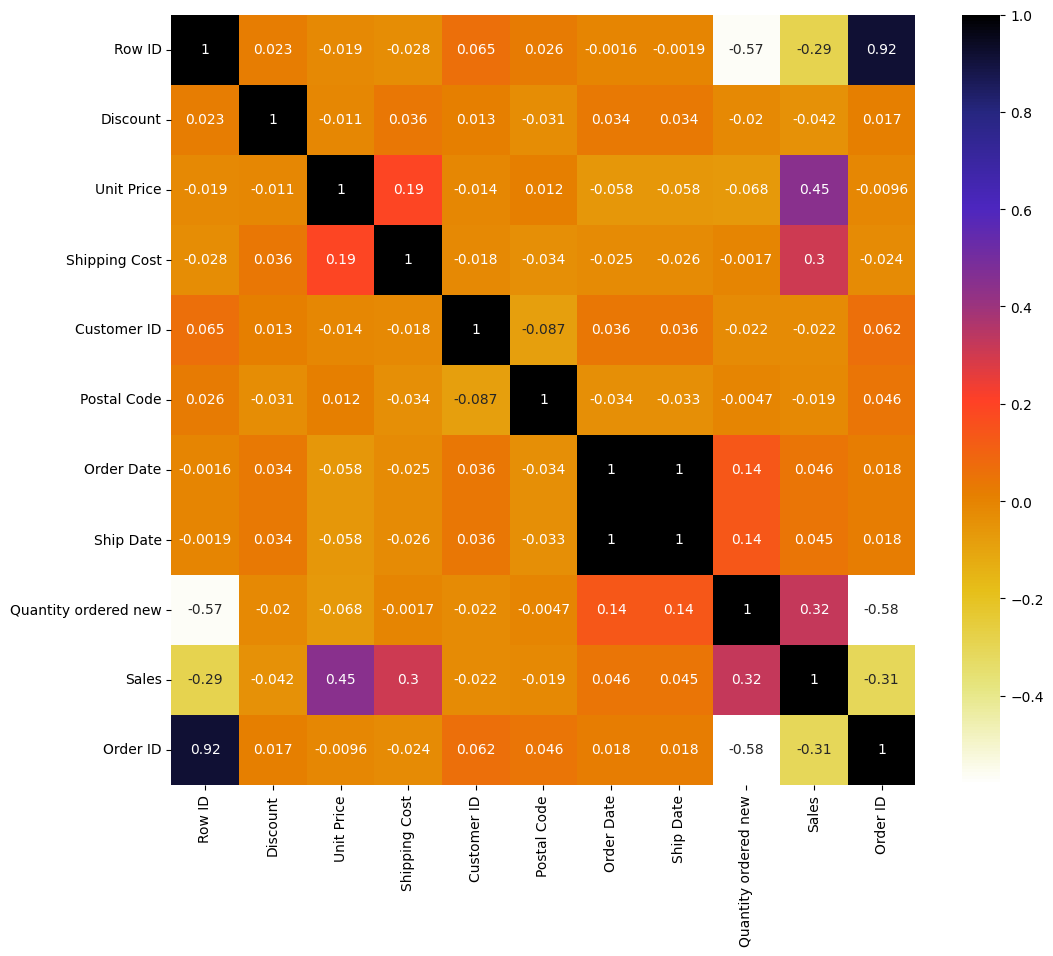

In [ ]:
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
# No features are highly correlated (0.7 - 0.9), hence we do not drop any feature.
corr_features = correlation(x_train, 0.7)
print(corr_features)

{'Ship Date', 'Order ID'}


##Chi2 test

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2

In [ ]:
print(x_train.dtypes)
print(y_train.dtypes)

Row ID                           int64
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Quantity ordered new           float64
Sales                          float64
Order ID                         int64
dtype: object
float64


In [ ]:
df_num1=new_df_num.select_dtypes(exclude='datetime64[ns]')
df_num1.corr()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Postal Code,Quantity ordered new,Sales,Order ID,Profit
Row ID,1.000000,0.023764,-0.004427,-0.015144,0.064071,0.033578,-0.569224,-0.258827,0.918497,-0.038468
Discount,0.023764,1.000000,-0.010811,0.029532,0.014370,-0.027152,-0.015828,-0.033625,0.022035,-0.060472
Unit Price,-0.004427,-0.010811,1.000000,0.195191,-0.008717,0.016086,-0.071677,0.443509,0.003292,-0.182067
Shipping Cost,-0.015144,0.029532,0.195191,1.000000,-0.019134,-0.030539,-0.008210,0.320958,-0.013914,0.002899
Customer ID,0.064071,0.014370,-0.008717,-0.019134,1.000000,-0.096491,-0.027946,-0.015412,0.069118,0.008852
Postal Code,0.033578,-0.027152,0.016086,-0.030539,-0.096491,1.000000,-0.013454,-0.019699,0.052141,0.033033
Quantity ordered new,-0.569224,-0.015828,-0.071677,-0.008210,-0.027946,-0.013454,1.000000,0.303983,-0.589784,0.119234
Sales,-0.258827,-0.033625,0.443509,0.320958,-0.015412,-0.019699,0.303983,1.000000,-0.270939,0.364258
Order ID,0.918497,0.022035,0.003292,-0.013914,0.069118,0.052141,-0.589784,-0.270939,1.000000,-0.031008
Profit,-0.038468,-0.060472,-0.182067,0.002899,0.008852,0.033033,0.119234,0.364258,-0.031008,1.000000


In [ ]:
X= df_num1.drop("Sales",axis=1)
Y = df_num1["Sales"]

In [ ]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
#fscore & pvalues
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,Y_train)

ValueError: Input X must be non-negative.

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1952 non-null   object        
 2   Discount              1952 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Name          1952 non-null   object        
 11  City                  1952 non-null   object        
 12  Postal Code           1952 non-null   int64         
 13  Order Date        

In [ ]:
enco_new_df=new_df[['Customer ID','Order Priority','Profit','Sales']]
enco_new_df.head()

,Customer ID,Order Priority,Profit,Sales
0,3,High,4.5600,13.01
1,5,Not Specified,4390.3665,6362.85
2,11,Critical,-53.8096,211.15
3,14,Medium,803.4705,1164.45
4,14,Medium,-24.0300,22.23


In [ ]:
enco_new_df['Order Priority']=np.where(enco_new_df['Order Priority']=="High",1,0)
enco_new_df.head()

<ipython-input-38-9fb62dcc0b22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enco_new_df['Order Priority']=np.where(enco_new_df['Order Priority']=="High",1,0)


,Customer ID,Order Priority,Profit,Sales
0,3,1,4.5600,13.01
1,5,0,4390.3665,6362.85
2,11,0,-53.8096,211.15
3,14,0,803.4705,1164.45
4,14,0,-24.0300,22.23


In [ ]:
enco_new_df.tail()

,Customer ID,Order Priority,Profit,Sales
1947,3397,1,-116.7600,207.31
1948,3397,1,-160.9520,143.12
1949,3399,0,-41.8700,59.98
1950,3400,0,-24.7104,135.78
1951,3403,1,349.4850,506.50


In [ ]:
enco_new_df["Customer ID"].unique()

array([   3,    5,   11, ..., 3399, 3400, 3403])

In [ ]:
enco_new_df["Customer ID"].value_counts()

Customer ID
699     9
2882    8
2491    7
3151    7
1193    7
       ..
1511    1
1519    1
1522    1
1526    1
3403    1
Name: count, Length: 1130, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Label_encoder = LabelEncoder()

In [ ]:
print(Label_encoder)

LabelEncoder()


In [ ]:
enco_new_df["Customer ID"]=Label_encoder.fit_transform(enco_new_df["Customer ID"])

<ipython-input-45-da347c37a683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enco_new_df["Customer ID"]=Label_encoder.fit_transform(enco_new_df["Customer ID"])


In [ ]:
enco_new_df.head()

,Customer ID,Order Priority,Profit,Sales
0,0,1,4.5600,13.01
1,1,0,4390.3665,6362.85
2,2,0,-53.8096,211.15
3,3,0,803.4705,1164.45
4,3,0,-24.0300,22.23


In [ ]:
enco_new_df.tail()

,Customer ID,Order Priority,Profit,Sales
1947,1126,1,-116.7600,207.31
1948,1126,1,-160.9520,143.12
1949,1127,0,-41.8700,59.98
1950,1128,0,-24.7104,135.78
1951,1129,1,349.4850,506.50


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1952 non-null   object        
 2   Discount              1952 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Name          1952 non-null   object        
 11  City                  1952 non-null   object        
 12  Postal Code           1952 non-null   int64         
 13  Order Date        

In [ ]:
new_df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Name,City,Postal Code,Order Date,Ship Date,Quantity ordered new,Sales,Order ID,Profit
0,20847,High,0.010000,2.84,0.930000,3,Bonnie Potter,Express Air,Corporate,Office Supplies,SANFORD Liquid Accent™ Tank-Style Highlighters,Anacortes,98221,2015-01-07,2015-01-08,4.000000,13.01,88522,4.5600
1,20228,Not Specified,0.020000,500.98,26.000000,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Global Troy™ Executive Leather Low-Back Tilter,San Gabriel,91776,2015-06-13,2015-06-15,12.955556,6362.85,90193,4390.3665
2,21776,Critical,0.049035,9.48,13.035656,11,Marcus Dunlap,Regular Air,Corporate,Furniture,"DAX Two-Tone Rosewood/Black Document Frame, De...",New York City,7203,2015-02-15,2015-02-17,22.000000,211.15,90192,-53.8096
3,24844,Medium,0.090000,78.69,19.990000,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,Prior Lake,55372,2015-05-12,2015-05-14,16.000000,1164.45,86838,803.4705
4,24846,Medium,0.049035,3.28,2.310000,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Newell 321,Prior Lake,55372,2015-05-12,2015-05-13,7.000000,22.23,86838,-24.0300


In [ ]:
new_df.isna().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Name            0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Quantity ordered new    0
Sales                   0
Order ID                0
Profit                  0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df1 = pd.DataFrame(scaler.fit_transform(new_df[['Sales', 'Profit']]), columns=['Sales', 'Profit'])
print(new_df1.head())

      Sales    Profit
0 -0.380120 -0.096627
1  2.101019  3.747806
2 -0.302698 -0.147791
3  0.069794  0.603668
4 -0.376517 -0.121688


In [ ]:
print(new_df1.shape)
new_df1.head()

(1952, 2)


,Sales,Profit
0,-0.380120,-0.096627
1,2.101019,3.747806
2,-0.302698,-0.147791
3,0.069794,0.603668
4,-0.376517,-0.121688


In [ ]:
len(new_df1)

1952

In [ ]:
new_df1.head()

,Sales,Profit
0,-0.380120,-0.096627
1,2.101019,3.747806
2,-0.302698,-0.147791
3,0.069794,0.603668
4,-0.376517,-0.121688


In [ ]:
column_names=['Row ID','Order Priority', 'Discount','Unit Price','Shipping Cost','Customer ID','Customer Name', 'Ship Mode','Customer Segment','Product Category', 'Product Name','City','Postal Code','Order Date','Ship Date','Quantity ordered new' ,'Sales' , 'Order ID' ,'Profit']
new_df.columns = column_names
new_df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Name', 'City', 'Postal Code', 'Order Date',
       'Ship Date', 'Quantity ordered new', 'Sales', 'Order ID', 'Profit'],
      dtype='object')

In [ ]:
new_df['OrderP_enc']=new_df["Order Priority"]
new_df['Sales_enc']=new_df["Sales"]
new_df['OrderID_enc']=new_df["Order ID"]

In [ ]:
df_encoded=new_df.drop(column_names, axis=1)
df_encoded

,OrderP_enc,Sales_enc,OrderID_enc
0,High,13.01,88522
1,Not Specified,6362.85,90193
2,Critical,211.15,90192
3,Medium,1164.45,86838
4,Medium,22.23,86838
...,...,...,...
1947,High,207.31,87536
1948,High,143.12,87536
1949,Not Specified,59.98,87534
1950,Medium,135.78,87537


In [ ]:
x = df_encoded.drop("OrderP_enc",axis=1)
y = df_encoded["OrderP_enc"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y,shuffle=True,test_size  = 0.20,random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((1561, 2), (391, 2))

In [ ]:
y_train.shape, y_test.shape

((1561,), (391,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(max_depth=4, random_state=0)
dt.fit(x, y)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
prediction = dt.predict(X_test)
prediction[:8]

array(['High', 'High', 'High', 'High', 'High', 'High', 'High', 'High'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(prediction,y_test))

               precision    recall  f1-score   support

     Critical       0.01      1.00      0.03         1
         High       0.87      0.23      0.36       327
          Low       0.00      0.00      0.00         0
       Medium       0.01      0.20      0.03         5
Not Specified       0.24      0.36      0.29        58

     accuracy                           0.25       391
    macro avg       0.23      0.36      0.14       391
 weighted avg       0.76      0.25      0.35       391



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import graphviz

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
# Print the column names of X_train
print(X_train.columns)

# Print the class names of y_train
print(y_train)

Index(['Sales_enc', 'OrderID_enc'], dtype='object')
299               Low
1023           Medium
1328    Not Specified
521              High
618            Medium
            ...      
835              High
1216    Not Specified
1653    Not Specified
559              High
684              High
Name: OrderP_enc, Length: 1561, dtype: object


[Text(0.4583333333333333, 0.9, 'OrderID_enc <= 89879.5\ngini = 0.799\nsamples = 1952\nvalue = [377, 1, 447, 381, 364, 382]\nclass = Not Specified'),
 Text(0.22916666666666666, 0.7, 'OrderID_enc <= 89575.5\ngini = 0.798\nsamples = 1444\nvalue = [292, 1, 339, 285, 274, 253]\nclass = Not Specified'),
 Text(0.125, 0.5, 'OrderID_enc <= 89550.5\ngini = 0.799\nsamples = 1358\nvalue = [272, 1, 305, 272, 259, 249]\nclass = Not Specified'),
 Text(0.08333333333333333, 0.3, 'OrderID_enc <= 89530.5\ngini = 0.799\nsamples = 1353\nvalue = [272, 1, 305, 267, 259, 249]\nclass = Not Specified'),
 Text(0.041666666666666664, 0.1, 'gini = 0.799\nsamples = 1350\nvalue = [269, 1, 305, 267, 259, 249]\nclass = Not Specified'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0]\nclass = Low'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5, 0, 0]\nclass = High'),
 Text(0.3333333333333333, 0.5, 'OrderID_enc <= 89803.0\ngini = 0.734\nsamples = 86\nvalue = [20, 0,

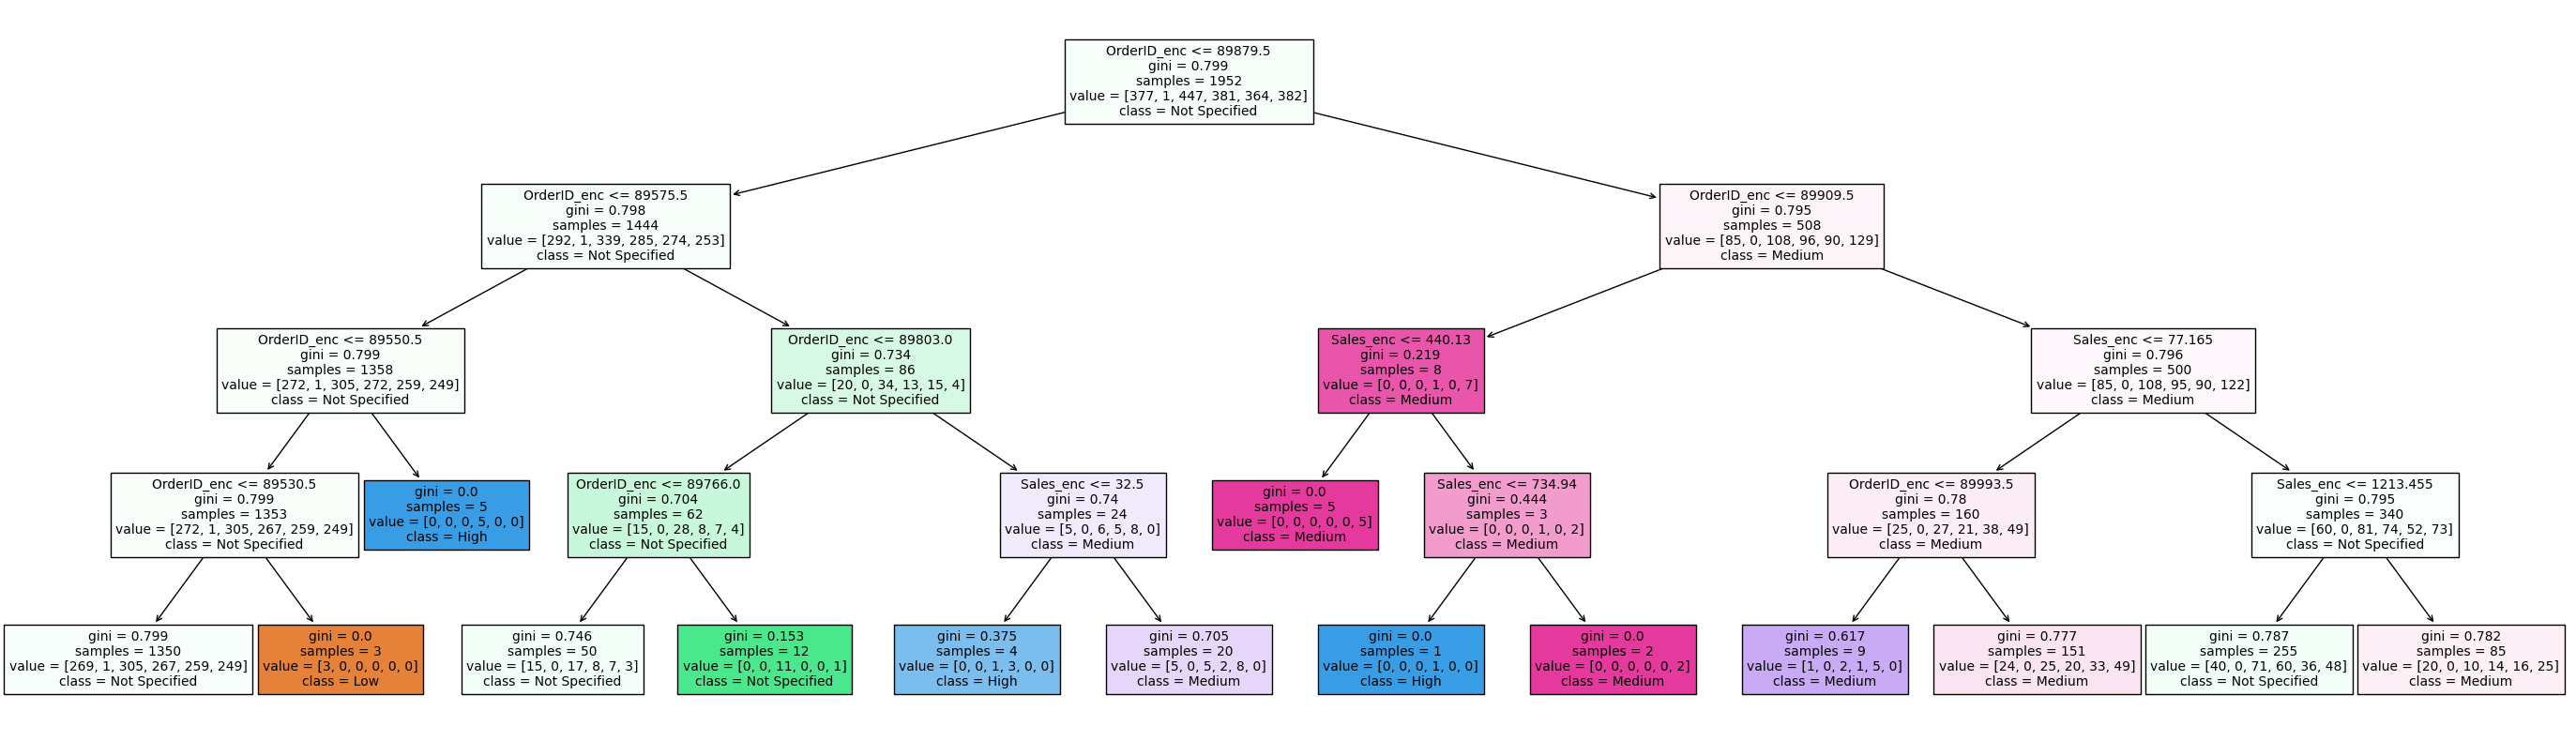

In [ ]:
# Change the feature_names to a list of strings
feature_names = list(X_train.columns)

# Change the class_names to a list of strings
class_names = list(y_train)

# Plot the tree
plt.figure(figsize=(35,10))
plot_tree(dt, filled=True, fontsize=10, feature_names=feature_names,
class_names=class_names)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=gnb.predict(X_test)

In [ ]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):",metrics.accuracy_score(y_test,y_pred)*100)
print(y_pred)

Gaussian Naive Bayes model accuracy(in %): 24.296675191815854
['High' 'High' 'Low' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'Not Specified' 'High' 'High' 'High' 'High'
 'Not Specified' 'High' 'High' 'High' 'Low' 'High' 'High' 'High' 'High'
 'Not Specified' 'Not Specified' 'High' 'Low' 'High' 'High' 'High' 'Low'
 'High' 'Low' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'Critical' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'Not Specified' 'High' 'High' 'Not Specified'
 'Critical' 'High' 'High' 'Low' 'High' 'Critical' 'High' 'Low' 'High'
 'High' 'Low' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'Critical' 'High' 'High' 'High' 'Not Specified'
 'High' 'High' 'High' 'High' 'Low' 'High' 'High' 'High' 'High' 'High'
 'High' 'High' 'High' 'High' 'High' 'Low' 'High' 'Low' 'High' 'High'
 'High' 'High' 'H

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

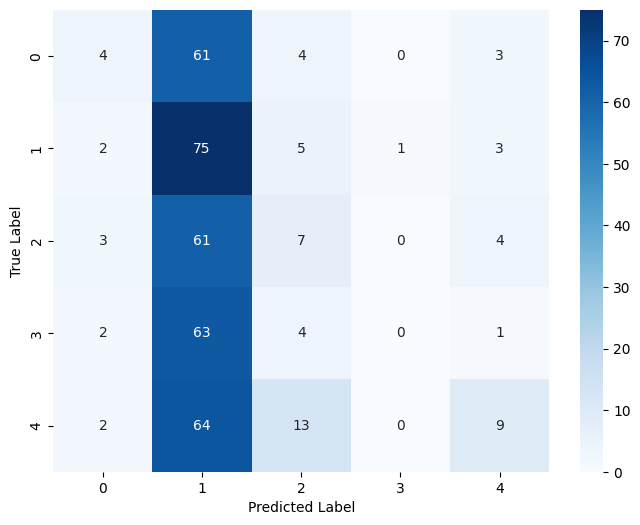

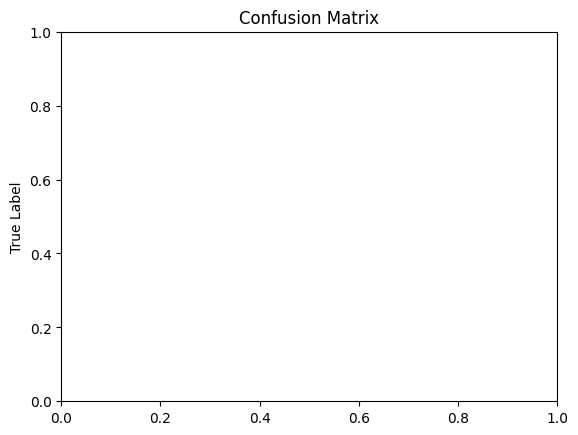

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
scaler = StandardScaler()
model = SVC()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
model.get_params().keys()
param_grid = {"C": [0,0.1,1,10,100,1000], "degree":[2,3,4,5], "gamma": ["scale","auto"], "kernel": ['linear', 'poly', 'rbf']}
grid = GridSearchCV(model,param_grid, cv=5, scoring="accuracy")
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
accuracy_percent=round(accuracy,2)
print("Accuracy is:",accuracy_percent*100,"%")
print(classification_report(y_test, y_pred))

Accuracy: 0.22
Accuracy is: 22.0 %
               precision    recall  f1-score   support

     Critical       0.11      0.03      0.04        72
         High       0.22      0.88      0.36        86
          Low       0.23      0.09      0.13        75
       Medium       0.00      0.00      0.00        70
Not Specified       0.00      0.00      0.00        88

     accuracy                           0.22       391
    macro avg       0.11      0.20      0.11       391
 weighted avg       0.11      0.22      0.11       391



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 2, 67,  3,  0,  0],
       [ 4, 76,  6,  0,  0],
       [ 3, 63,  7,  2,  0],
       [ 2, 64,  4,  0,  0],
       [ 7, 68, 11,  2,  0]])

In [ ]:
!git remote add origin https://github.com/Vedika945/Order-Priority.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
